In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast

# Preprocess data 

### 405:
regex : ([a-zA-Z0-9]*): to replace with : "$1":

regex : (\([0-9]*,[0-9]*\)) to replace with "$1"

regex : (True|False) to replace with "$1"

regex : " " to replace with ""

### TIL:
regex : ([a-zA-Z]+[0-9]{0,1}): to replace with : "$1":

regex : (True|False) to replace with "$1"

([0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2}\.[0-9]*) to replace with "$1"

regex : (\([0-9]*,[0-9]*\)) to replace with "$1"

In [138]:
file = open('LpsData_STS405b.txt', 'r')

df = pd.DataFrame(columns=["MarkersValid", "TrolleyPos", "Hoistpos", "NoOfMarkers", "m1", "m2", "m3", "m4", "m5", "m6"])
tab = []
while True:
    line = file.readline()
    if not line:
        break
    res = json.loads("{"+line+"}")
    df.loc[len(df)] = res

df.to_csv("sts405.csv", index=False)

In [2]:
file = open('LpsData_TILsts.txt', 'r')

df = pd.DataFrame(columns=["Time", "MarkersValid", "TrolleyPos", "Hoistpos", "NoOfMarkers", "m1", "m2", "m3", "m4", "m5", "m6"])
tab = []
while True:
    line = file.readline()
    if not line:
        break
    res = json.loads("{"+line+"}")
    df.loc[len(df)] = res

df.to_csv("TILsts.csv", index=False)

# Exploration des données / Plots

In [153]:
df.head()

,MarkersValid,TrolleyPos,Hoistpos,NoOfMarkers,m1,m2,m3,m4,m5,m6
0,True,28.285,4.947,6,"(63382,63453)","(68948,63504)","(66250,63637)","(46590,100851)","(80082,111422)","(91254,120923)"
1,True,28.285,4.947,5,"(63381,63453)","(68946,63504)","(66250,63636)","(88349,103933)","(111103,109365)","(38222,109347)"
2,True,28.285,4.947,6,"(63386,63452)","(68951,63503)","(66255,63633)","(111109,113055)","(129417,119518)","(127152,123718)"
3,True,28.285,4.947,6,"(63384,63457)","(68950,63508)","(66256,63644)","(115677,108628)","(105525,110415)","(94293,121239)"
4,True,28.285,4.947,7,"(63376,63459)","(68942,63511)","(66248,63649)","(98350,95010)","(64812,101301)","(122626,112416)"


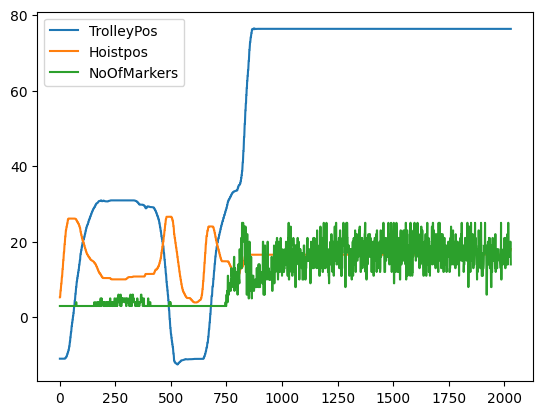

In [143]:
df.plot()
df.to_csv("sts405.csv", index=False)

In [5]:
# Sélection des colonnes contenant les coordonnées des marqueurs
marker_columns = [col for col in df.columns if col.startswith('m') and not col.endswith('x') and not col.endswith('y')]
print(marker_columns)


res = {marker_column: [] for marker_column in marker_columns}
for marker_column in marker_columns:
    arr = df[marker_column].values
    tab = []
    for val in arr:
        tab.append(ast.literal_eval(val))
    res[marker_column] = tab


['m1', 'm2', 'm3', 'm4', 'm5', 'm6']


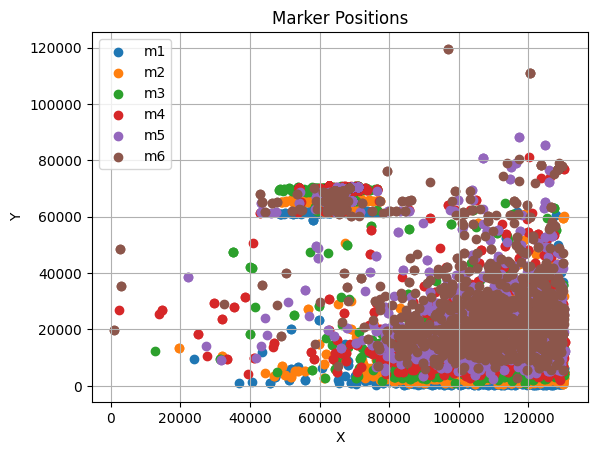

In [147]:
data = res

# Plotting
for marker, coordinates in data.items():
    x_values, y_values = zip(*coordinates)
    plt.scatter(x_values, y_values, label=marker)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Marker Positions')
plt.legend()
plt.grid(True)
plt.show()


len(data) b4: 1146
len(data) after: 1080


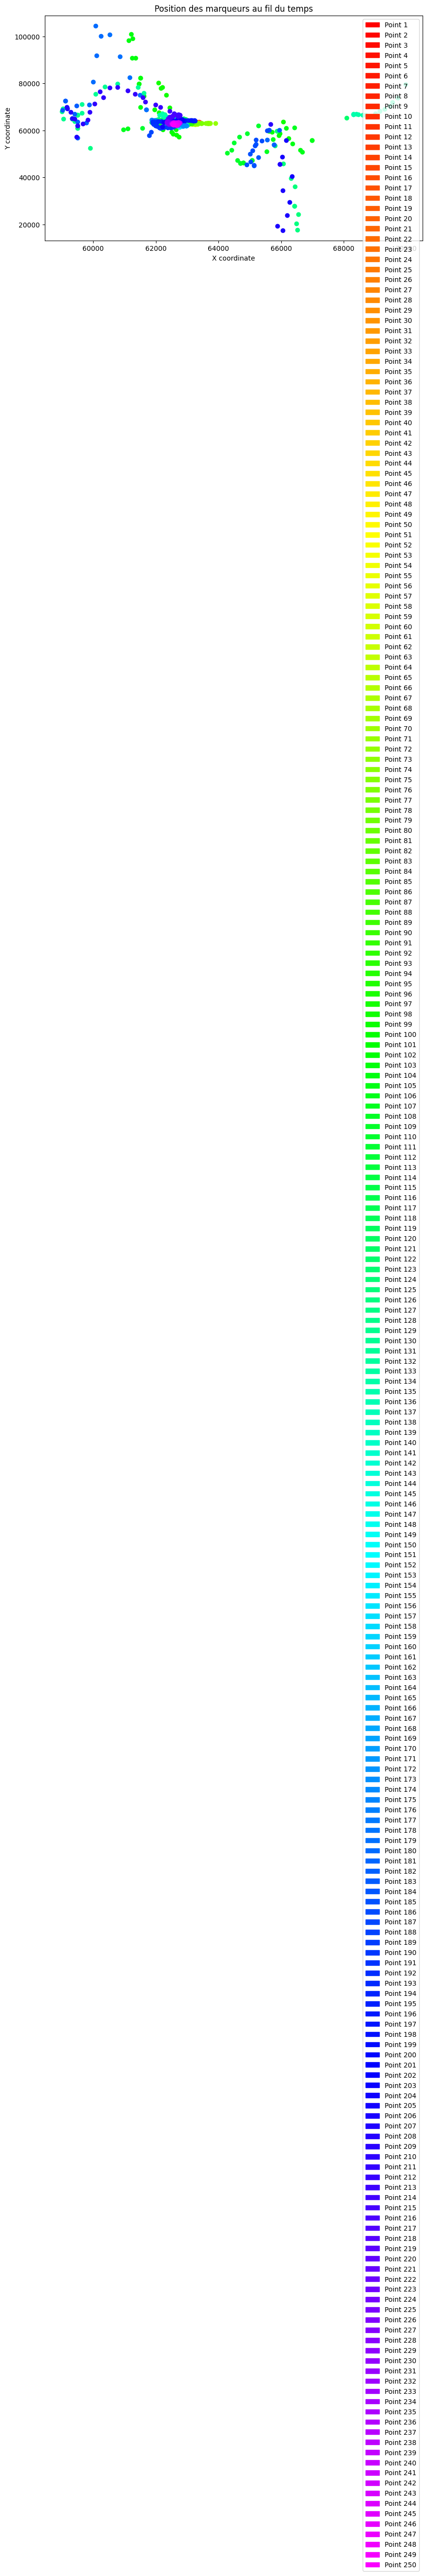

In [7]:
# Charger les données à partir des fichiers texte
# data1 = pd.read_csv(".txt", delimiter="\t")
import colorsys
import matplotlib.patches as mpatches
from matplotlib.widgets import Slider

data = pd.read_csv("TILsts.csv")
print("len(data) b4:", len(data))
data = data[data["MarkersValid"]==True]
print("len(data) after:", len(data))

# Visualisation des marqueurs et de leur mouvement
markers_data = data.filter(like='m', axis=1)  # Sélectionner uniquement les colonnes contenant les coordonnées des marqueurs
plt.figure(figsize=(10, 6))

colors = []
patches = []
l_x = []
l_y = []

for i in range(250):
    rgb = colorsys.hsv_to_rgb(i / 300., 1.0, 1.0)
    colors.append(rgb)
    patch = mpatches.Patch(color=rgb, label=f"Point {i+1}")
    patches.append(patch)

for j in range(len(markers_data["m1"])):
    x = ast.literal_eval(markers_data.iloc[j]["m1"])[0]
    y = ast.literal_eval(markers_data.iloc[j]["m1"])[1]
    l_x.append(x)
    l_y.append(y)
    # print(j/len(markers_data["m1"]))
    # print("colors:", j/len(markers_data["m1"])*len(colors))
    # print("len colors:", len(colors))
    id_color = int(j/len(markers_data["m1"])*len(colors))
    plt.scatter(x, y, color=colors[id_color])
  
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Position des marqueurs au fil du temps")

plt.legend(handles=patches)
plt.show()

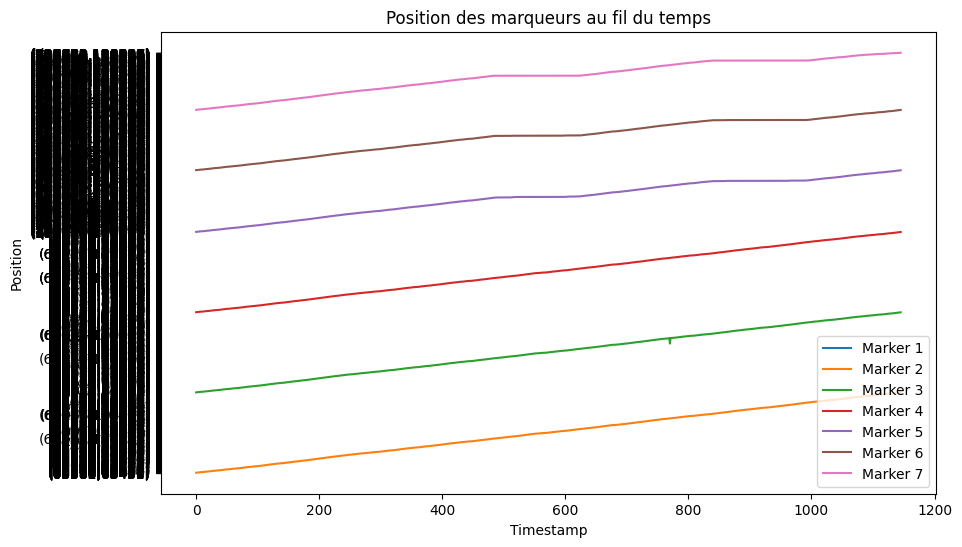

ValueError: could not convert string to float: '(62536,62390)'

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger les données à partir des fichiers texte
# data1 = pd.read_csv(".txt", delimiter="\t")
data = pd.read_csv("TILsts.csv")

# Préparation des données pour l'apprentissage automatique
X = data[['TrolleyPos', 'Hoistpos', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6']]
y = data['MarkersValid']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

# Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Si vous êtes satisfait de la performance du modèle, vous pouvez l'utiliser pour prédire si un log est bon ou non.
# Par exemple, vous pouvez utiliser rf_classifier.predict(new_data) où new_data est un nouveau jeu de données à prédire.
